# **Assignment 10**

In [2]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import fetch_openml
#plotly or other graphing library

In [3]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()
boston = fetch_openml(name='boston', version=2)

c:\Users\bobbt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [4]:
iris_df =pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris_df.head())
iris_df['species'] = iris.target_names[iris.target]
target_names_list = list(iris.target_names)
print(target_names_list)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
['setosa', 'versicolor', 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [5]:
knn_model = KNN(n_neighbors=5)
knn_model.fit(iris.data, iris.target)
new_observations = [[6.0, 3.0, 4.0, 1.3],
    [5.5, 2.5, 5.0, 1.8],
    [4.8, 3.2, 1.4, 0.1]]
predictions = knn_model.predict(new_observations)
predicted_species = [iris.target_names[prediction] for prediction in predictions]

print(predicted_species)

['versicolor', 'virginica', 'setosa']


**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [6]:
X_train, X_test, y_train, y_test = tts(iris.data, iris.target, test_size=0.2, random_state=42)

# Create a kNN classifier with specified number of neighbors
knn = KNN(n_neighbors=5)

# Fit the kNN model with the training data
knn.fit(X_train, y_train)

# Predict the categories using the test data
predictions = knn.predict(X_test)

# Calculate and return the accuracy score
accuracy = knn.score(X_test, y_test)
print(accuracy)

print("Accuracy Score:", accuracy)

1.0
Accuracy Score: 1.0


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

Neighbors: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] 

Training Accuracies: {1: 1.0, 2: 0.9666666666666667, 3: 0.95, 4: 0.9583333333333334, 5: 0.9666666666666667, 6: 0.9666666666666667, 7: 0.975, 8: 0.9583333333333334, 9: 0.9666666666666667, 10: 0.9833333333333333, 11: 0.9583333333333334, 12: 0.975, 13: 0.9666666666666667, 14: 0.975, 15: 0.975, 16: 0.975, 17: 0.9666666666666667, 18: 0.9666666666666667, 19: 0.9583333333333334, 20: 0.9666666666666667, 21: 0.9583333333333334, 22: 0.975, 23: 0.9666666666666667, 24: 0.9666666666666667, 25: 0.9666666666666667, 26: 0.9666666666666667, 27: 0.9583333333333334, 28: 0.9666666666666667, 29: 0.95, 30: 0.9666666666666667} 

Testing Accuracies: {1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 0.9666666666666667, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 2

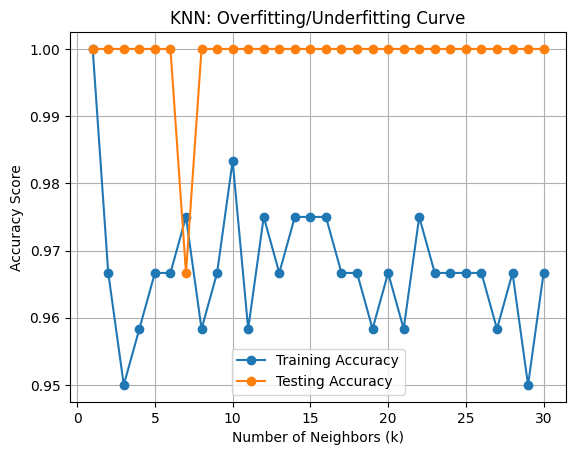

In [7]:
neighbors = np.arange(1, 31)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    # Set up a KNN Classifier
    knn = KNN(n_neighbors=neighbor)
    
    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# Print the results
print("Neighbors:", neighbors, '\n')
print("Training Accuracies:", train_accuracies, '\n')
print("Testing Accuracies:", test_accuracies)

# Plot the accuracies
plt.title("KNN: Overfitting/Underfitting Curve")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy", marker='o')
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy", marker='o')
plt.legend()
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.show()

**Q5** 10 pts

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

In [8]:
boston = fetch_openml(name='boston', version=2)

boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)

target_df = pd.DataFrame(data=boston.target, columns=['MEDV'])

average_age = boston_df['AGE'].mean()

average_medv = target_df['MEDV'].mean()

result_values = [average_age, average_medv, target_df['MEDV'].values]

print("Average AGE:", average_age)
print("Average MEDV:", average_medv)
print("Target values as NumPy array:", result_values)

Average AGE: 68.57490118577076
Average MEDV: nan
Target values as NumPy array: [68.57490118577076, nan, array([], dtype=object)]


c:\Users\bobbt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
